In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy
from dotenv import load_dotenv

In [14]:
AU_COLS = ['AU01_r',
'AU02_r',
'AU04_r',
'AU05_r',
'AU06_r',
'AU07_r',
'AU09_r',
'AU10_r',
'AU12_r',
'AU14_r',
'AU15_r',
'AU17_r',
'AU20_r',
'AU23_r',
'AU25_r',
'AU26_r',
'AU45_r']

# Working dir

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [4]:
load_dotenv()

# path to save figures
output_path = os.getenv("VIDEO_OUT")

# Global configuration path
glob_conf_path = '../global_config.py'

In [5]:
output_path

'/home/tim/work/su-thesis-project/emotional-recognition/files/tests/out/video/'

# Load

In [11]:
exec(open(glob_conf_path).read())

load_path = os.path.join(output_path, 'success_ratio_90_and_over.csv')
df = pd.read_csv(load_path)

In [12]:
df

,filename,video_id,emotion_1,emotion_1_id,frame,success,confidence,AU01_r,AU02_r,AU04_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A74_conc_v_3,A74,conc,27,1,0,0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00
1,A74_conc_v_3,A74,conc,27,2,0,0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00
2,A74_conc_v_3,A74,conc,27,3,0,0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00
3,A74_conc_v_3,A74,conc,27,4,0,0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00
4,A74_conc_v_3,A74,conc,27,5,0,0,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,A74_conc_v_3,A74,conc,27,197,1,1,0.42,0.02,1.60,...,1.07,0.0,1.55,0.0,0.31,0.0,0.0,0.47,0.02,0.14
197,A74_conc_v_3,A74,conc,27,198,1,1,0.44,0.00,1.58,...,0.99,0.0,1.53,0.0,0.39,0.0,0.0,0.51,0.05,0.21
198,A74_conc_v_3,A74,conc,27,199,1,1,0.44,0.00,1.54,...,0.99,0.0,1.47,0.0,0.31,0.0,0.0,0.57,0.06,0.21
199,A74_conc_v_3,A74,conc,27,200,1,1,0.41,0.00,1.55,...,0.96,0.0,1.51,0.0,0.29,0.0,0.0,0.50,0.10,0.08


## Inspect impact of missing frames

Let's inspect the impact of unsuccessfull or low confidence frames on and individual video

Unsuccessfull and low confidence frames results in a graph with more zero values, and more often has a zigzag kind of shape. 

This indicates that unsuccessfull and low confidence frames defaults to zero.

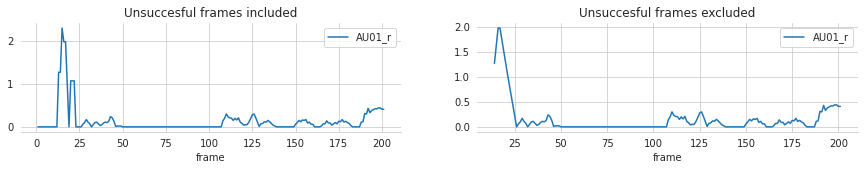

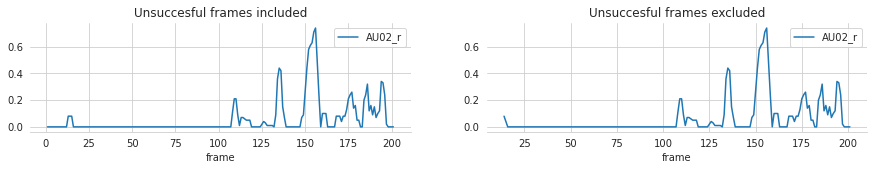

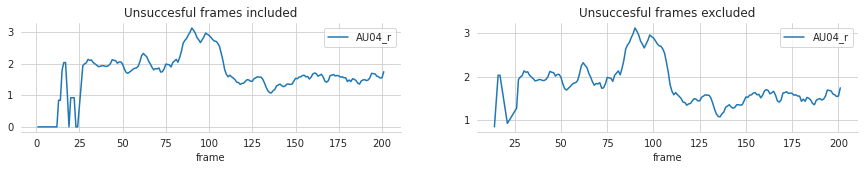

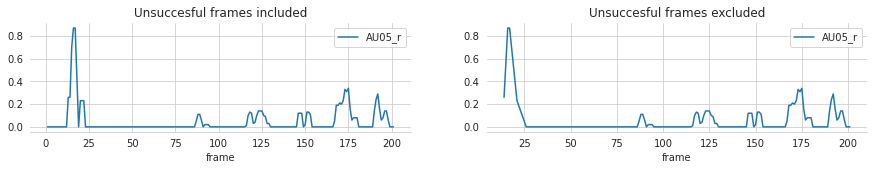

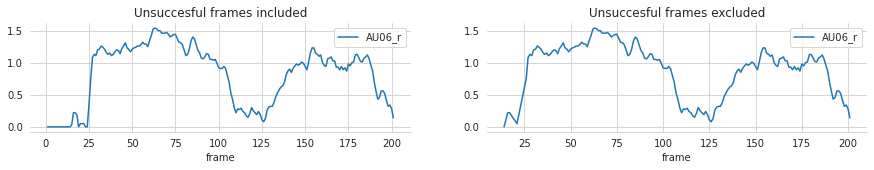

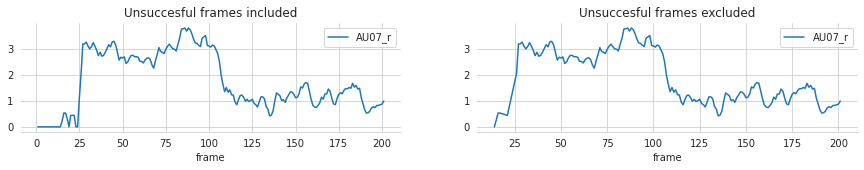

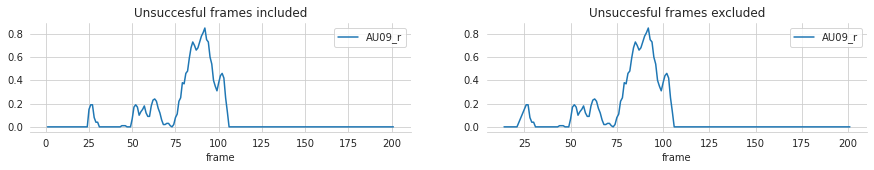

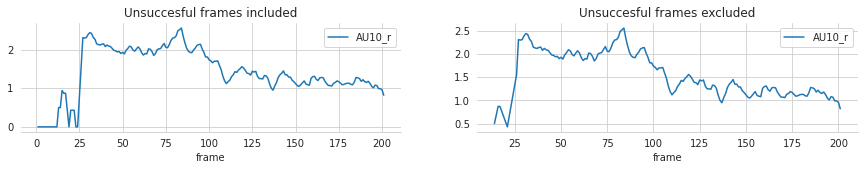

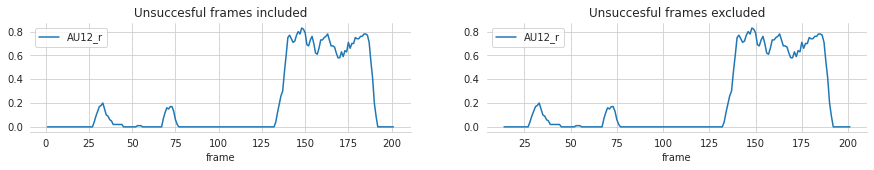

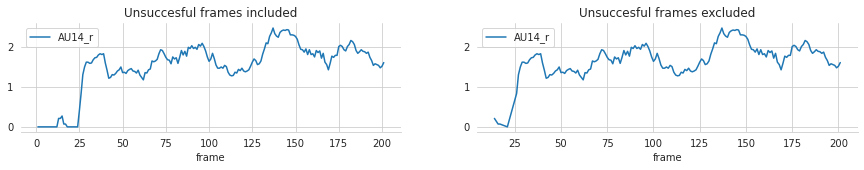

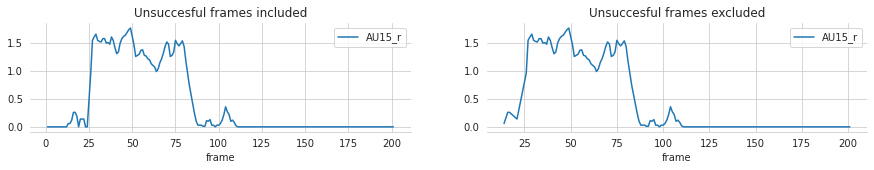

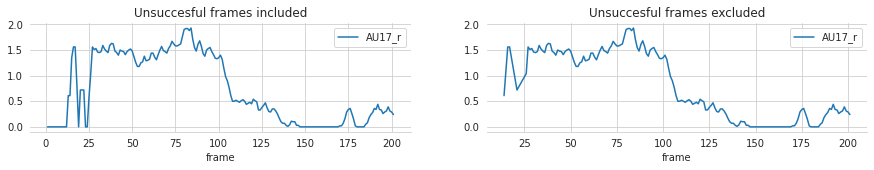

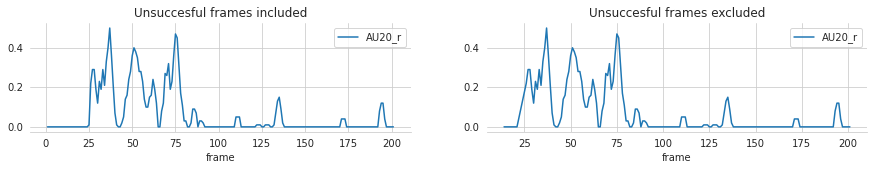

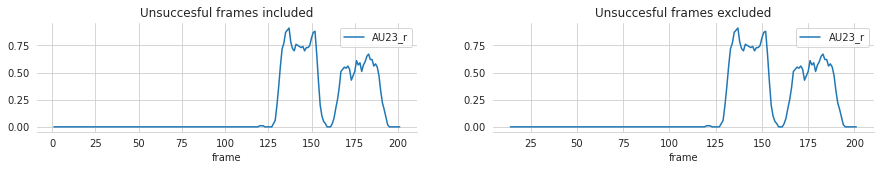

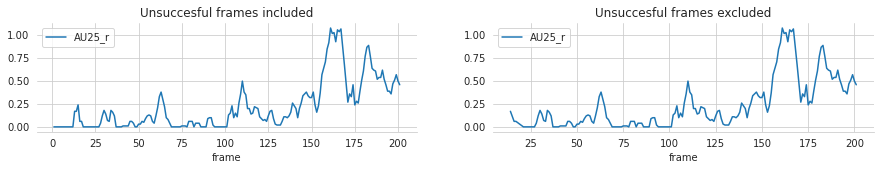

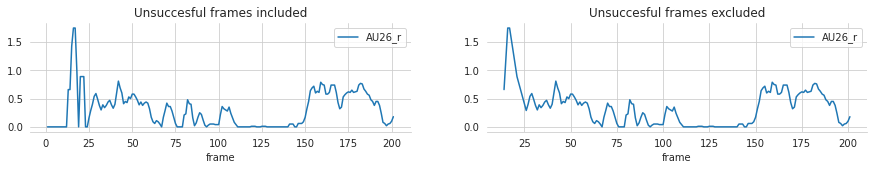

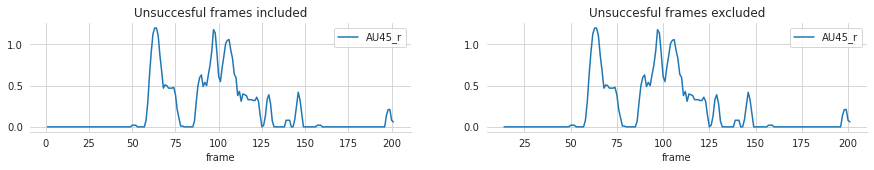

In [15]:
df_success = df[(df['success'] == 1) & (df['confidence'] == 1)]

for au in AU_COLS:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].set_title("Unsuccesful frames included")
    axes[1].set_title("Unsuccesful frames excluded")

    df.plot(x = 'frame', y = au, ax=axes[0], figsize=(15, 2))
    df_success.plot(x = 'frame', y = au, ax=axes[1], figsize=(15, 2))

## Linear interpolation

In order to salvage the data, and minimize the impact of missing frames we will use linear interpolation to smooth the curves over the missing frames.

In [16]:
df_inter = df.copy()

# set the AU value of all rows with bad frames to NaN
for au in AU_COLS:
    df_inter.loc[(df['success'] != 1) | (df_inter['confidence'] != 1), au] = np.NaN

In [18]:
df_inter.isna().sum().sum()

357

In [133]:
df_inter[AU_COLS] = df_inter[AU_COLS].interpolate(method='linear')

In [135]:
# drop rows that couldn't be interpolated
df_inter = df_inter.dropna()

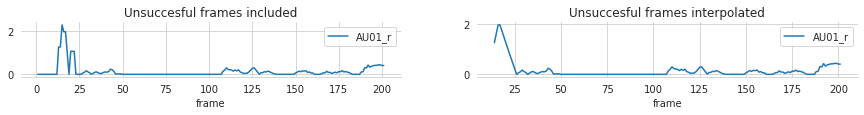

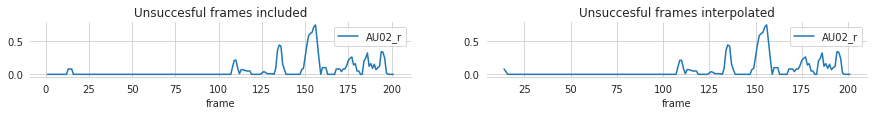

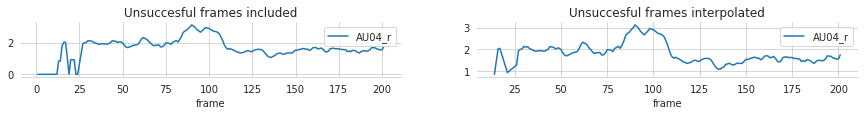

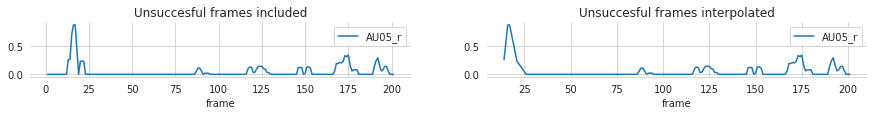

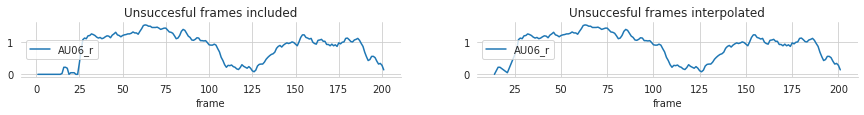

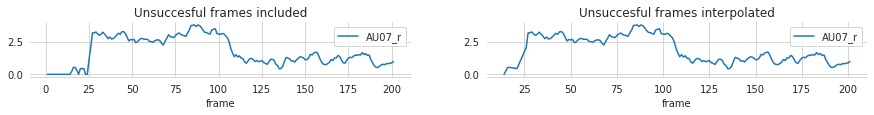

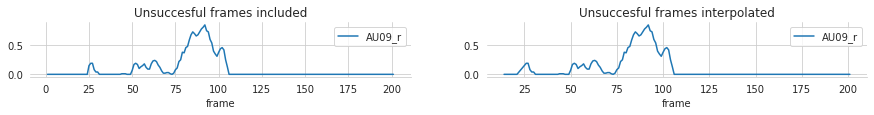

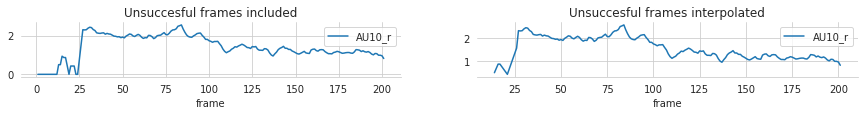

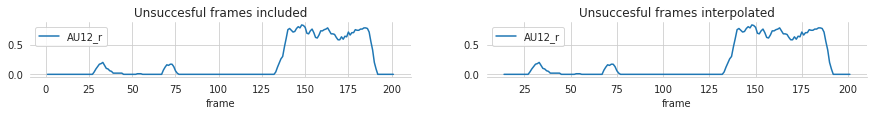

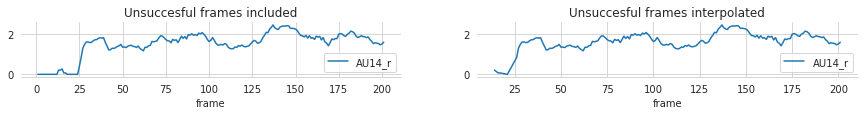

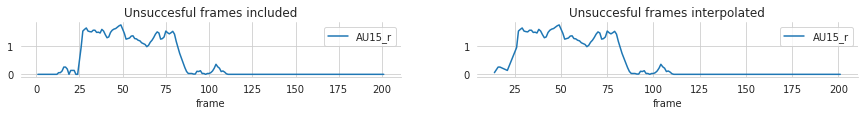

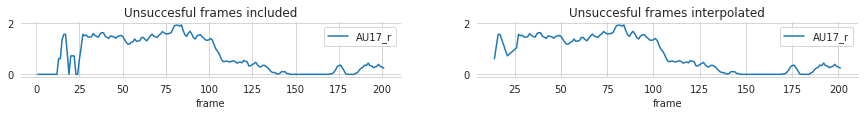

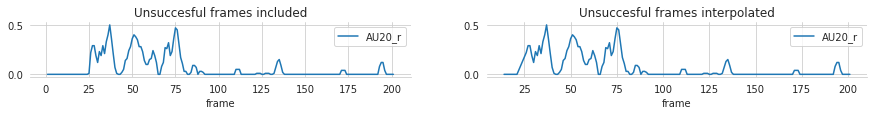

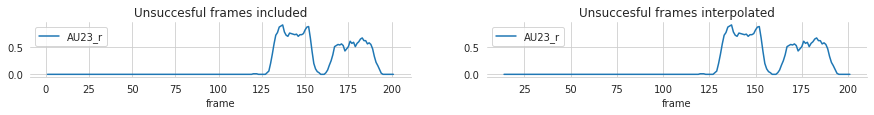

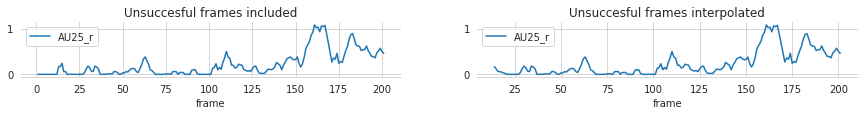

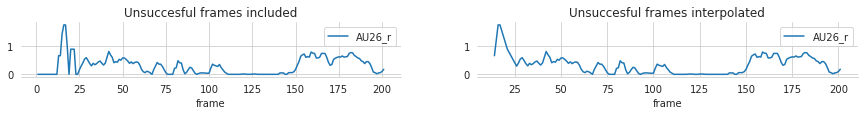

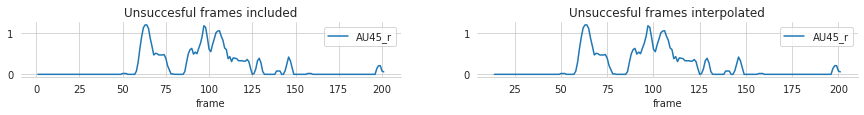

In [139]:
for au in AU_COLS:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].set_title("Unsuccesful frames included")
    axes[1].set_title("Unsuccesful frames interpolated")

    df.plot(x = 'frame', y = au, ax=axes[0], figsize=(15, 2))
    df_inter.plot(x = 'frame', y = au, ax=axes[1], figsize=(15, 2))